In [1]:
#importar bibliotecas básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
from dython.nominal import associations

In [228]:
sns.set_theme()
df = pd.read_csv('base.csv')
df.head()

,Id,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,Beco,FormaProp,PlanoProp,Servicos,...,AreaPiscina,QualidadePiscina,QualidadeCerca,Outros,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1460 non-null   int64  
 1   ClasseImovel          1460 non-null   int64  
 2   ClasseZona            1460 non-null   object 
 3   Fachada               1201 non-null   float64
 4   TamanhoLote           1460 non-null   int64  
 5   Rua                   1460 non-null   object 
 6   Beco                  91 non-null     object 
 7   FormaProp             1460 non-null   object 
 8   PlanoProp             1460 non-null   object 
 9   Servicos              1460 non-null   object 
 10  ConfigLote            1460 non-null   object 
 11  InclinacaoLote        1460 non-null   object 
 12  Bairro                1460 non-null   object 
 13  Estrada1              1460 non-null   object 
 14  Estrada2              1460 non-null   object 
 15  TipoHabitacao        

Antes de entrar na EDA, vamos separar as variáveis em seus respectivos grupos: categóricas e contínuas.

In [4]:
# variáveis categóricas
quali_features = [coluna for coluna in df.columns
                if df[coluna].dtype == 'object']

# variáveis contínuas
quant_features = [coluna for coluna in df.columns if df[coluna].dtype in [
    'int64', 'float64'] and coluna not in ['Id', 'PrecoVenda']]

print(f' No dataset existem {len(quali_features)} variáveis categóricas')
print(f' No dataset existem {len(quant_features)} variáveis contínuas')

 No dataset existem 43 variáveis categóricas
 No dataset existem 36 variáveis contínuas


# Análise Exploratória dos Dados (EDA)

## Variáveis Categóricas

In [5]:
#olhar informações apenas das variáveis categóricas
df[quali_features].describe(include='object')

,ClasseZona,Rua,Beco,FormaProp,PlanoProp,Servicos,ConfigLote,InclinacaoLote,Bairro,Estrada1,...,LocalGaragem,AcabamentoGaragem,QualidadeGaragem,CondicaoGaragem,EntradaPavimentada,QualidadePiscina,QualidadeCerca,Outros,TipoVenda,CondicaoVenda
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


<AxesSubplot:title={'center':' Contagem de Valores Faltantes Variáveis Categóricos'}>

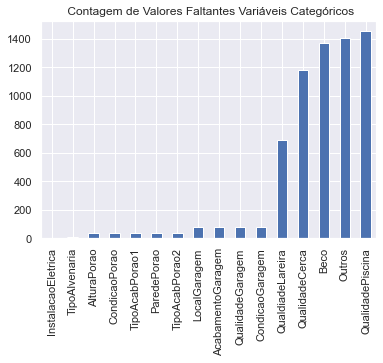

In [6]:
#plotando as informações sobre as variáveis categóricas em um gráfico
faltantes = df[quali_features].isnull().sum()
faltantes = faltantes[faltantes >0]
titulo = ' Contagem de Valores Faltantes Variáveis Categóricos'
faltantes.sort_values().plot(kind = 'bar',title = titulo)

Podemos observar que as colunas QualidadeLareira,QualidadeCerca,Beco,Outros e Qualidade da Piscina possuem um número muito elevado de valores nulos (maiores que 47%). 

In [7]:
quali_features = list(set(quali_features) - set(['QualdiadeLareira','QualidadeCerca','Beco','Outros','QualidadePiscina']))
print(f' Agora contamos com {len(quali_features)} variáveis categóricas')

 Agora contamos com 38 variáveis categóricas


Próximo passo é verificar se as variáveis categóricas que permaneceram estão preenchidas com o mesmo valor, fato este que pode ser visto no uso da função describe anteriormente.

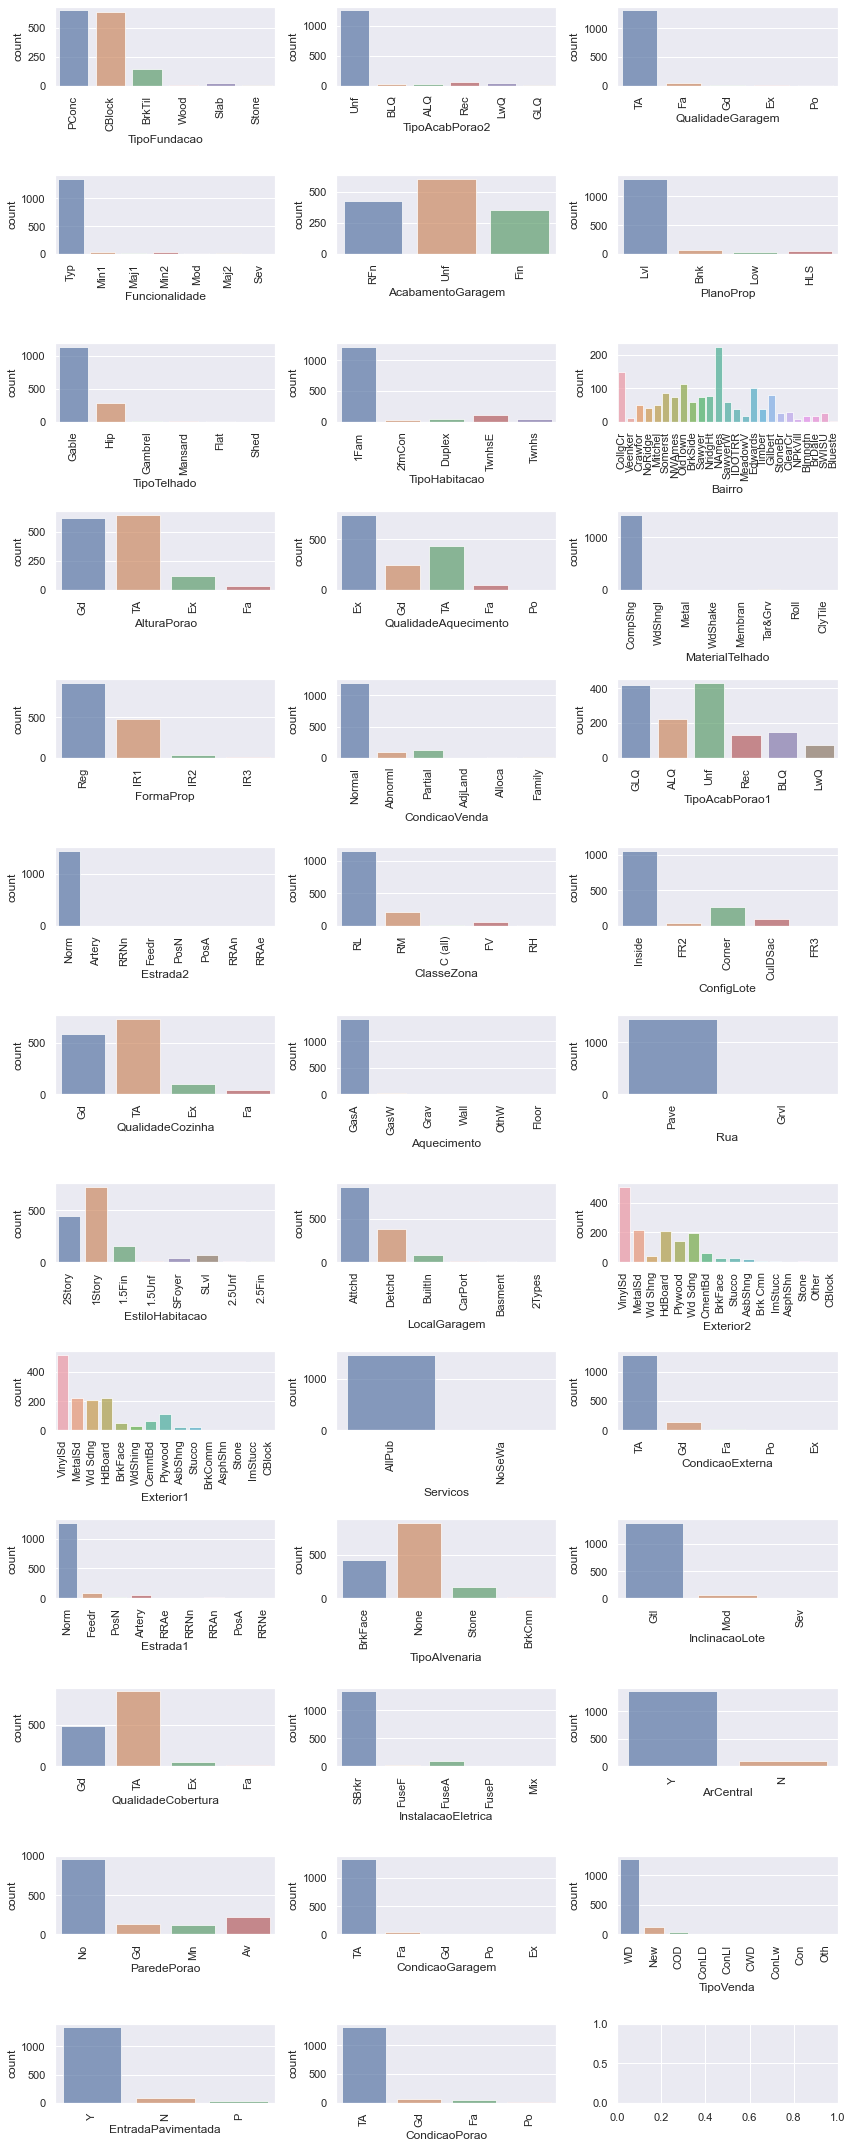

In [8]:
fig, axes = plt.subplots(round(len(df[quali_features].columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df[quali_features].columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=df[quali_features].columns[i], alpha=0.7, data=df[quali_features], ax=ax)
        
fig.tight_layout()

A partir dos gráficos, podemos observar que as variáveis: ClasseZona, CondicaoExterna,ArCentral, TipoHabitacao,Aquecimento,PlanoProp,TipoAcabPorao2,TipoVenda,MaterialTelhado,Servicos,ParedePorao,
QualidadeGaragem,Estrada1,CondicaoGaragem,Rua,InstalacaoEletrica,EntradaPavimentada,InclinacaoLote,
TipoTelhado,CondicaoVenda,LocalGaragem,CondicaoPorao,Estrada2,Funcionalidade,ConfigLote 
apresentam apenas um ou dois valores diferentes. Provavelmente não serão importantes para o modelo.



In [9]:
s = 'ClasseZona,CondicaoExterna,ArCentral,TipoHabitacao,Aquecimento,PlanoProp,TipoAcabPorao2,TipoVenda,MaterialTelhado,Servicos,ParedePorao,QualidadeGaragem,Estrada1,CondicaoGaragem,Rua,InstalacaoEletrica,EntradaPavimentada,InclinacaoLote,TipoTelhado,CondicaoVenda,LocalGaragem,CondicaoPorao,Estrada2,Funcionalidade,ConfigLote'
quali_features = list(set(quali_features) - set(s.split(',')))
print(f' Agora contamos com {len(quali_features)} variáveis categóricas')

 Agora contamos com 13 variáveis categóricas


Agora que restam apenas 13 variáveis, fica mais fácil analisarmos sua relação com a variável target que é o Preço de Venda do imóvel.

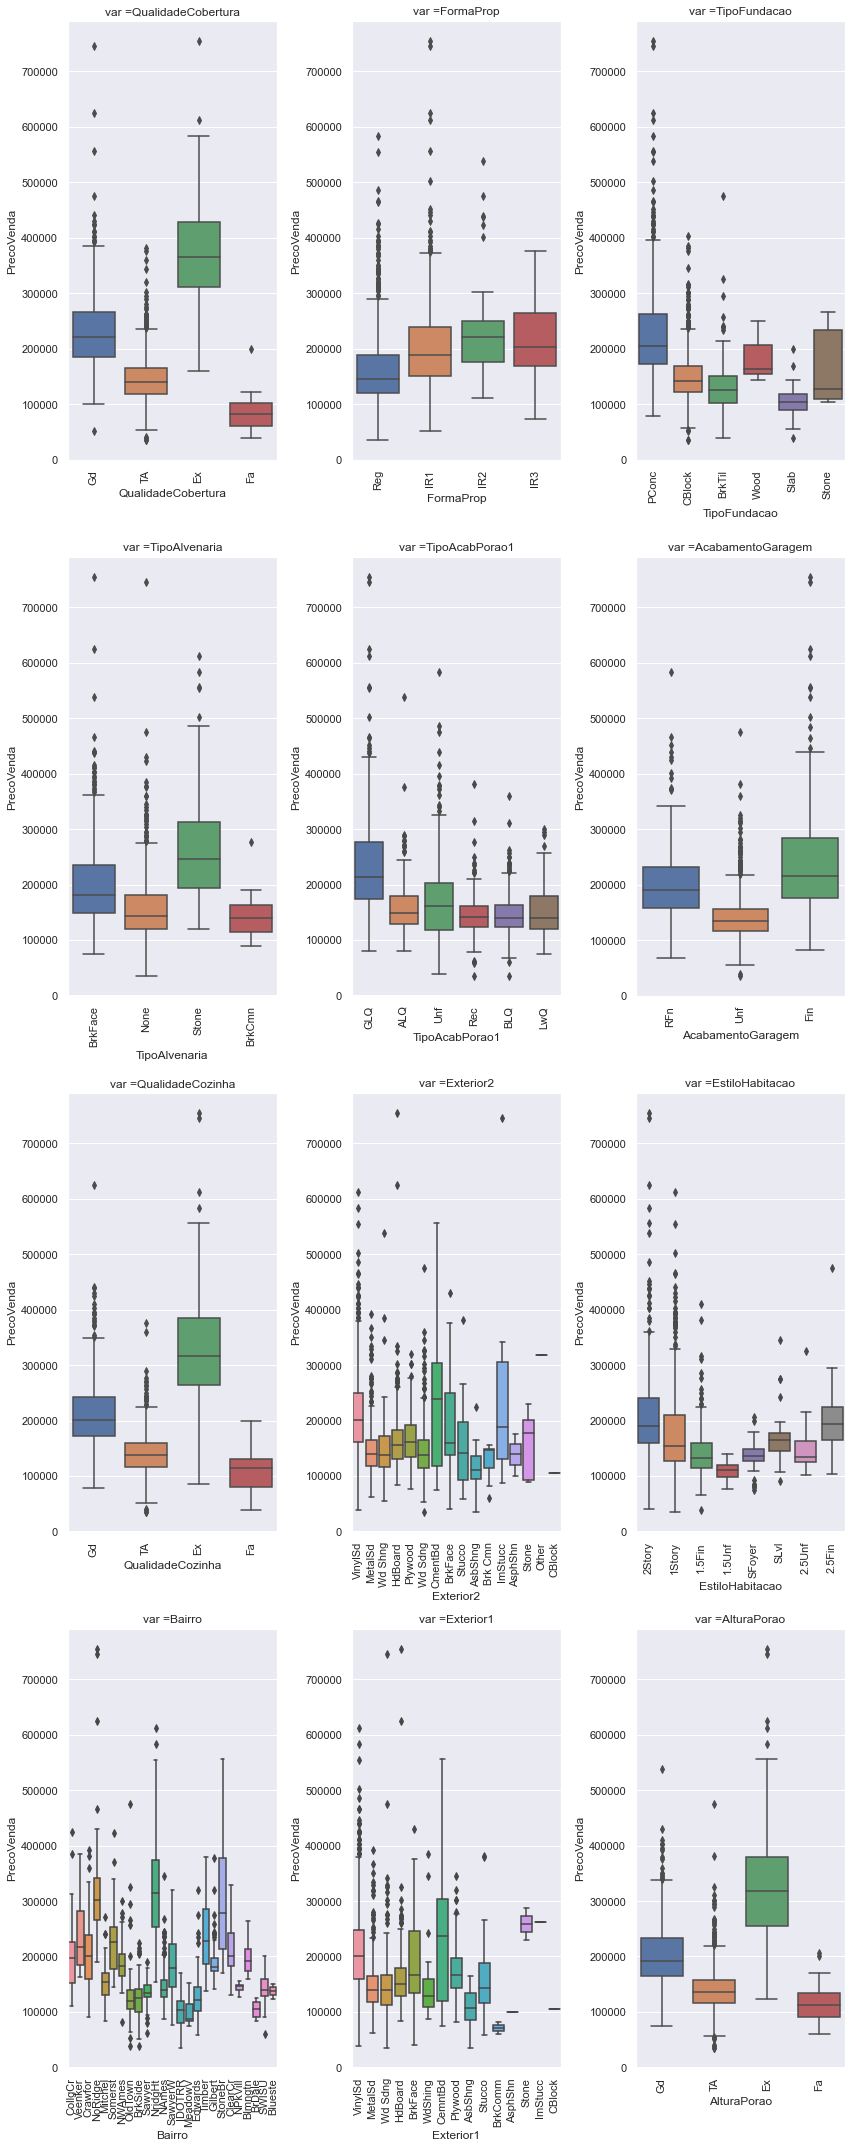

In [10]:
fig, axes = plt.subplots(round(len(df[quali_features].columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df[quali_features].columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.boxplot(x=df[quali_features].columns[i], y = 'PrecoVenda', data=df, ax=ax)
        ax.set_title('var ='+df[quali_features].columns[i])
        
fig.tight_layout()

Insights dos boxplots:

$\cdot$ Acabemento da Garagem aparenta ter alguma influência no preço das casas, pois casas onde está finalizado ou são rústicos 

$\cdot$ Exterior e Forma da Propriedade possuem um comportamento irregular. Aparentemente propriedades irregulares possuem maior preço de venda

$\cdot$ Qualidade da cozinha afeta positivamente o preço de venda dos imóveis, principalmente onde o estado é excelente

$\cdot$ Estilo Habitação notamos que casas inacabadas possuem valores de venda menor, o que faz sentido

$\cdot$ O Bairro aparenta também influenciar bastante nos preços

$\cdot$ Variáveis relacionadas ao porão , cobertura também apresentam influência no valor de venda. Quanto melhor, o preço mediano tendo a ser maior

Sendo assim, vamos procurar dentre as 13 variáveis categóricas aquela(s) que tem mais importância para o modelo. Irei utilizar o teste ANOVA pois trata-se de um modelo de reressão.

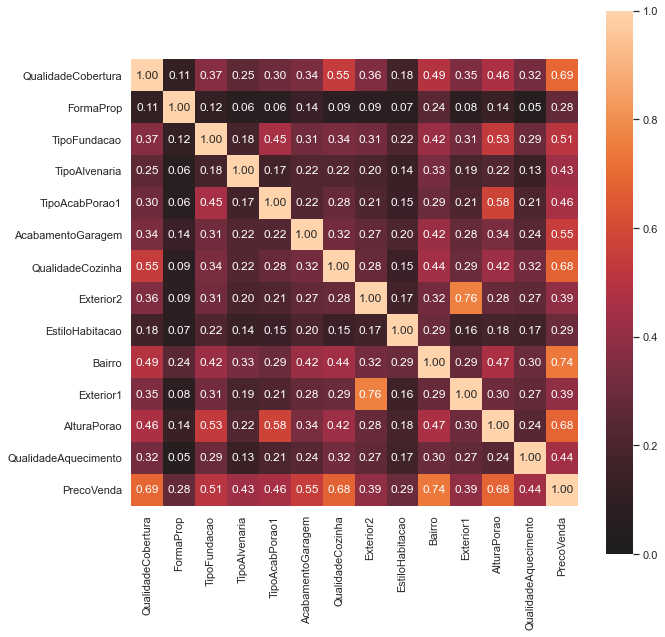

{'corr':                       QualidadeCobertura  FormaProp  TipoFundacao  \
 QualidadeCobertura              1.000000   0.111983      0.371131   
 FormaProp                       0.111983   1.000000      0.116556   
 TipoFundacao                    0.371131   0.116556      1.000000   
 TipoAlvenaria                   0.252391   0.064253      0.183889   
 TipoAcabPorao1                  0.297602   0.063558      0.454470   
 AcabamentoGaragem               0.338924   0.141348      0.307498   
 QualidadeCozinha                0.546038   0.092337      0.342992   
 Exterior2                       0.355249   0.093261      0.313956   
 EstiloHabitacao                 0.176323   0.073257      0.215954   
 Bairro                          0.485240   0.244025      0.417266   
 Exterior1                       0.350628   0.081534      0.314597   
 AlturaPorao                     0.464362   0.140162      0.531379   
 QualidadeAquecimento            0.323666   0.052850      0.292533   
 PrecoVenda 

In [11]:
# função da biblioteca dython que gera correlação com variáveis categóricas
associations(df[quali_features+['PrecoVenda']],figsize=(10, 10))

Podemos observar que as variáveis com maior corelação com o preço de venda são: Bairro, QualidadeCozinha,QualidadeCobertura,AlturaPorao. Sendo assim, farei alguma transformação apenas nessas.

In [12]:
quali_ouro_features = ['Bairro','QualidadeCozinha','QualidadeCobertura','AlturaPorao']

## Variáveis Quantitativas

In [13]:
#olhar algumas informações importantes das variáveis quantitativas
#neste caso irei incluir alguns percentis que não são default para verificar outliers
df[quant_features].describe(percentiles = [.01,.25,.05,.75,.99])

,ClasseImovel,Fachada,TamanhoLote,Qualidade,Condicao,AnoConstrucao,AnoReforma,AreaAlvenaria,AreaAcabPorao1,AreaAcabPorao2,...,AreaGaragem,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,ValorOutros,MesVenda,AnoVenda
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
1%,20.000000,21.000000,1680.000000,3.000000,3.000000,1899.180000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
5%,20.000000,34.000000,3311.700000,4.000000,4.000000,1916.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
99%,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,830.380000,...,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000


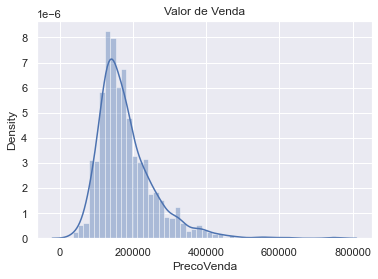

In [14]:
fig, ax = plt.subplots()
ax = sns.distplot(df['PrecoVenda'])
plt.title('Valor de Venda')
plt.show()

Pode-se observar que o valor de venda apresenta uma distribuição assimétrica à direita. Posteriormente, transformações serão necessárias...

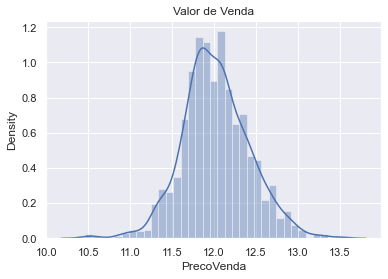

In [15]:
#utilizando uma transformação do tipo log(x+1), raiz quadrada
y = df['PrecoVenda']
y_log = np.log(y)

fig, ax = plt.subplots()
ax = sns.distplot(y_log)
plt.title('Valor de Venda')
plt.show()

Podemos ver visualmente que a distribuição após a transformação já apresenta uma distribuição mais simétrica que a anterior.

<AxesSubplot:title={'center':' Contagem de Valores Faltantes Variáveis Contínuas'}>

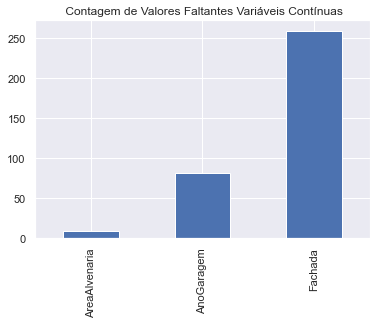

In [16]:
#plotando as informações sobre as variáveis contínuas em um gráfico
faltantes = df[quant_features].isnull().sum()
faltantes = faltantes[faltantes >0]
titulo = ' Contagem de Valores Faltantes Variáveis Contínuas'
faltantes.sort_values().plot(kind = 'bar',title = titulo)

Observa-se que Fachada e AnoGaragem possuem uma quantidade significativa de valores faltantes. Ainda não serão dropados, mas fica a observação.

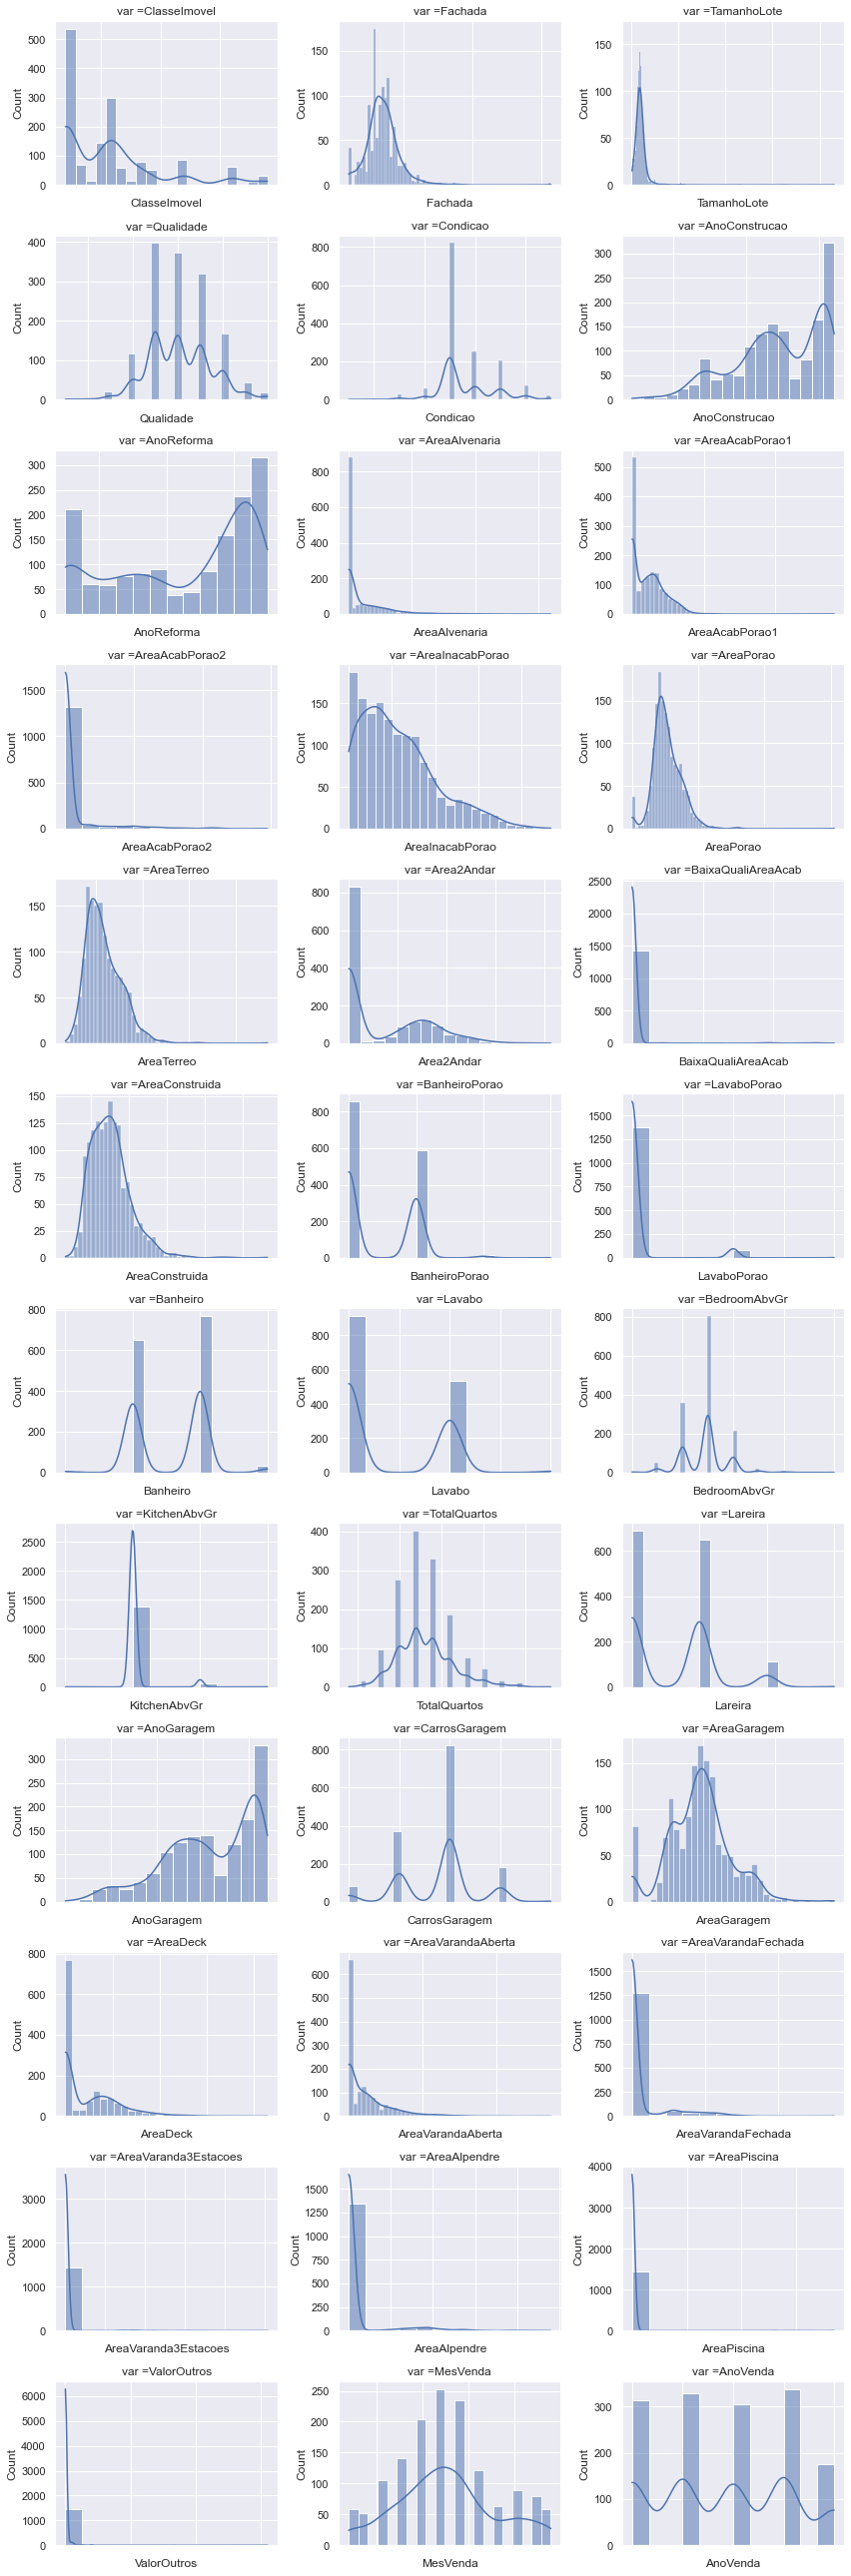

In [17]:
fig, axes = plt.subplots(round(len(df[quant_features].columns) / 3), 3, figsize=(12, 36))

for i, ax in enumerate(fig.axes):
    if i < len(df[quant_features].columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.histplot(x=df[quant_features].columns[i], data=df,kde = True,ax=ax)
        ax.set_title('var ='+df[quant_features].columns[i])
        plt.xticks(rotation = 90)
        
fig.tight_layout()

Algumas variáveis como AreaGaragem,AreaTerreo,AreaPorao, Fachada aparentam ser boas candidatas para a regressão. Outras porém possuem poucos valores diferentes como AreaPiscina,AreaAlpendre,AreaVaranda3Estacoes... . Antes de tomar qualquer decisão analisaremos um sccater plot e a matriz de correlação.

ValueError: No variables found for grid columns.

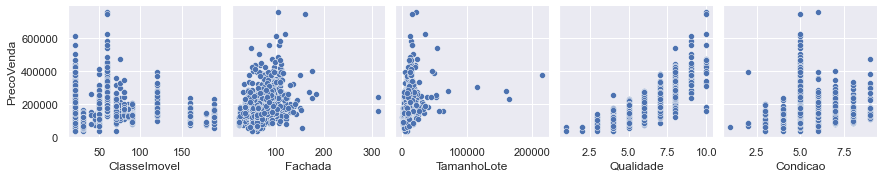

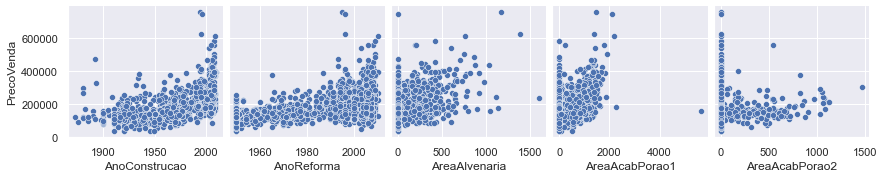

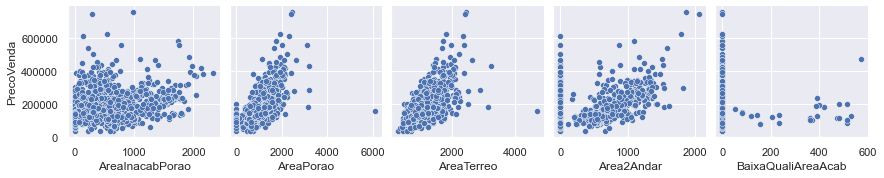

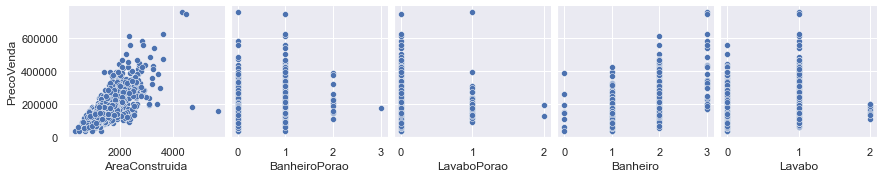

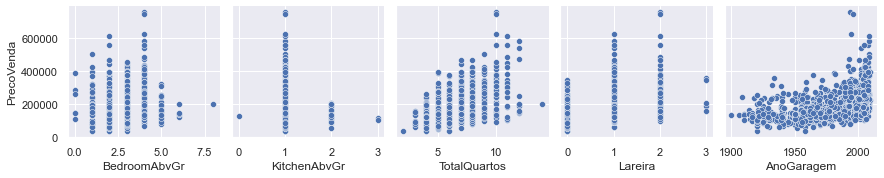

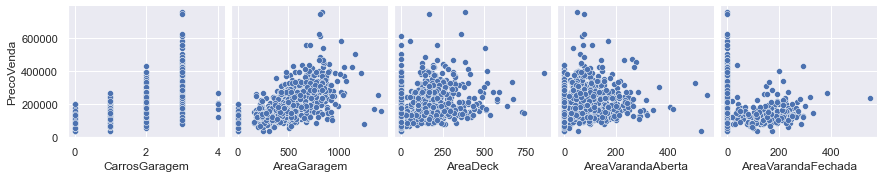

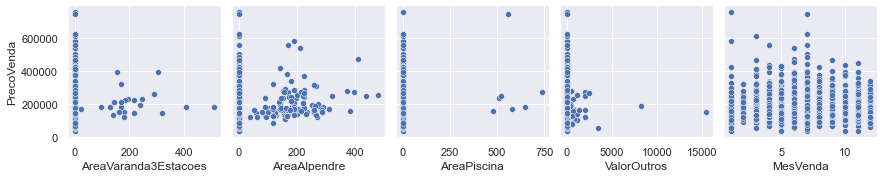

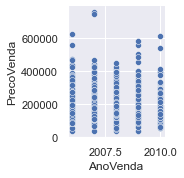

In [18]:
for i in range(0, len(df[quant_features+['PrecoVenda']]), 5):
    sns.pairplot(data=df[quant_features+['PrecoVenda']],
                x_vars=df[quant_features].columns[i:i+5],
                y_vars=['PrecoVenda'])

Insights dos gráficos

$\cdot$ O tamanho do lote não tem uma influência específica no preço, porém a área construida (no geral da casa):AreaPorao, AreaTerreo, Area2Andar,AreaConstruida tendem a aumentar o preço de venda (o que faz sentido). Outra variável que tambpem aparenta aumentar o valor da casa é a quantidade de quartos ( tecnicamente casas maiores possuem mais quartos...).

$\cdot$ Áreas referentes a garagem, deck varandas, alpendres aparentam não influenciar significativamente o preço de venda

$\cdot$ Data da venda não aparenta influenciar 

$\cdot$ A qualidade geral do imóvel impacta positivamente no valor

...Agora vamos ver a correlação entre as variáveis. Como o número é muito elevado, apenas será mostrado aqueles onde a correlação é forte/moderada x>=0.5 e x<=-0.5

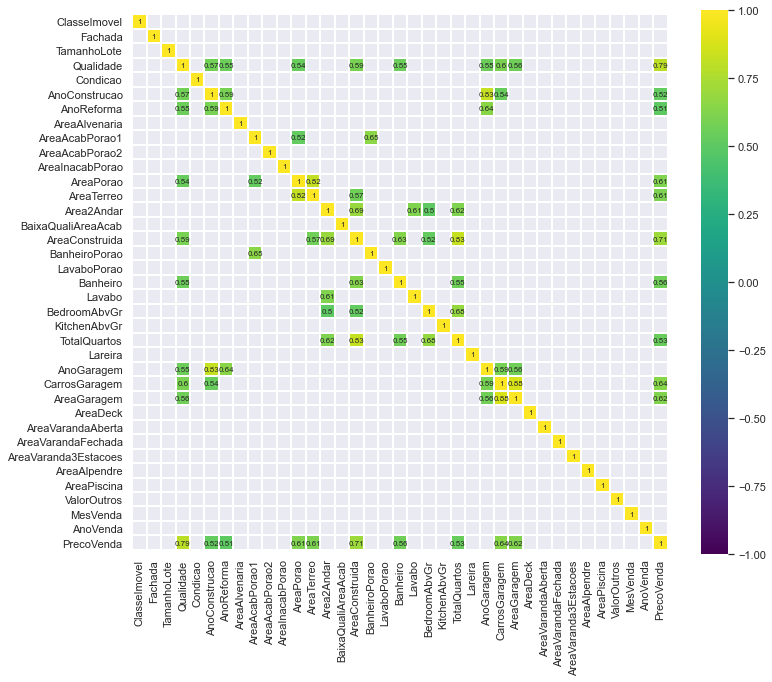

In [19]:
corr = df[quant_features+['PrecoVenda']].corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Apesar de difícil de enxergar, existem 10 variáveis com uma correlação maior que 0.5 ou menor que -0.5. Estas serão chamadas de quant_ouro_features

In [20]:
#pegando apenas valores com interesse excluindo o PrecoVenda e fazendo o looping
quant_ouro_features = []
corr_valor = corr.loc[:,'PrecoVenda'][:-1]
for chave,valor in corr_valor.items():
    if ((valor >=0.5) or (valor <=-0.5)):
        quant_ouro_features.append(chave)
print(f'Contamos com {len(quant_ouro_features)} variáveis contínuas')

Contamos com 10 variáveis contínuas


Antes de passarmos para a a fase de limpeza de dados, vejamos se entre nossas "variáveis de ouro" alguma está correlacionada com a outro ( evitar problemas de multicolinearidade. 

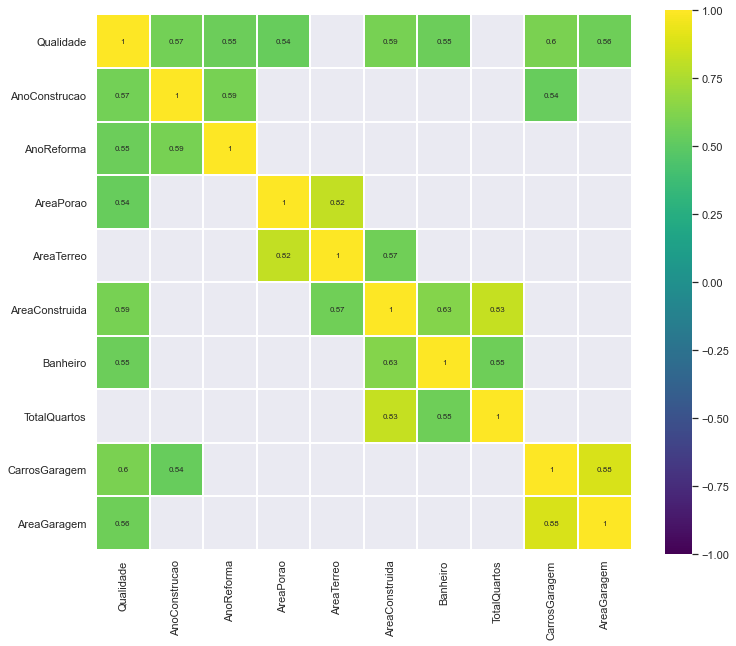

In [21]:
corr = df[quant_ouro_features].corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Variáves CarrosGaragem e Area Garagem estão fortemente correlacionadas, o que faz sentido pois ao aumentar o número de carros, precisamos de uma área maior de garagem. 

No mesmo sentido a área construida está relacionada com no numero de quartos, banheiros e área do terreno pois casas maiores tendem a possuir mais quartos e banheiros. 

A Qualidade da casa tamém está relacionada com a área, casas maiores possuem qualidade maior neste caso

## Pré - processamento

Após a finalização da EDA diminuímos a quantidade de variáveis tanto categóricas quanto contínuas. Partimos de 79 variáveis independentes e agora contamos com 10 contínuas e 4 qualitativas.

In [22]:
df_2 = df[quant_ouro_features + quali_ouro_features + ['PrecoVenda']]
df_2.head(10)

,Qualidade,AnoConstrucao,AnoReforma,AreaPorao,AreaTerreo,AreaConstruida,Banheiro,TotalQuartos,CarrosGaragem,AreaGaragem,Bairro,QualidadeCozinha,QualidadeCobertura,AlturaPorao,PrecoVenda
0,7,2003,2003,856,856,1710,2,8,2,548,CollgCr,Gd,Gd,Gd,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,Veenker,TA,TA,Gd,181500
2,7,2001,2002,920,920,1786,2,6,2,608,CollgCr,Gd,Gd,Gd,223500
3,7,1915,1970,756,961,1717,1,7,3,642,Crawfor,Gd,TA,TA,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,NoRidge,Gd,Gd,Gd,250000
5,5,1993,1995,796,796,1362,1,5,2,480,Mitchel,TA,TA,Gd,143000
6,8,2004,2005,1686,1694,1694,2,7,2,636,Somerst,Gd,Gd,Ex,307000
7,7,1973,1973,1107,1107,2090,2,7,2,484,NWAmes,TA,TA,Gd,200000
8,7,1931,1950,952,1022,1774,2,8,2,468,OldTown,TA,TA,TA,129900
9,5,1939,1950,991,1077,1077,1,5,1,205,BrkSide,TA,TA,TA,118000


<AxesSubplot:title={'center':' Contagem de Valores Faltantes Variáveis '}>

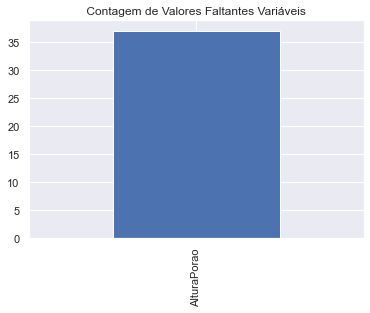

In [23]:
#plotando as informações sobre dados faltantes nas variáveis finais em um gráfico
faltantes = df_2.isnull().sum()
faltantes = faltantes[faltantes >0]
titulo = ' Contagem de Valores Faltantes Variáveis '
faltantes.sort_values().plot(kind = 'bar',title = titulo)

Trata-se de uma variável categórica, neste caso irei optar por imputar com a moda após o split.

## Feature Engineering

Serão Criadas as seguintes variáveis:

$\cdot$ quarto_banheiro_razao : razão entre a quantidade de quartos e banheiros em uma casa

$\cdot$ garagem_carro_razao : razão entre a área da garagem e a quantidade de carros

$\cdot$ reforma : caso o ano da reforma seja o mesmo da construção será 0, caso contrário 1, significando que alguma reforma recente foi realizada.

In [24]:
df['quarto_banheiro_razao'] = df['TotalQuartos']/df['Banheiro']
df['garagem_carro_razao'] = df['AreaGaragem']/df['CarrosGaragem']

'''
0 - sem reforma após construção
1 - com reforma após construção
'''

condicoes = [
    (df['AnoConstrucao'] == df['AnoReforma']),
    (df['AnoConstrucao'] != df['AnoReforma'])
]

df['reforma'] = np.select(condicoes, [0, 1], default=0)

# Parte 1 : Regressão Stats Model 

No DeepNote

# Parte 2 : Random Forest

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn import set_config

In [26]:
df.head()

,Id,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,Beco,FormaProp,PlanoProp,Servicos,...,Outros,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda,quarto_banheiro_razao,garagem_carro_razao,reforma
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,4.0,274.000000,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,3.0,230.000000,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,3.0,304.000000,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,7.0,214.000000,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,4.5,278.666667,0


In [236]:
#PIPELINE com modelo
quali_features = [coluna for coluna in df.columns
                if df[coluna].dtype == 'object']

# variáveis contínuas
quant_features = [coluna for coluna in df.columns if df[coluna].dtype in [
    'int64', 'float64'] and coluna not in ['Id', 'PrecoVenda']]


#pré-processamento das variáveis qualitativas
quali_passos = [('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoding',OrdinalEncoder(handle_unknown ='use_encoded_value',unknown_value = -1))]
quali_transformer = Pipeline(quali_passos)

#pré-processamento das variáveis quantitativas
quant_passos = [
    ('imp', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())]
quant_transformer = Pipeline(quant_passos)

#pre-processador 
preprocessor = ColumnTransformer(
    transformers=[
        ('quantitativas', quant_transformer, quant_features),
        ('qualitativas', quali_transformer, quali_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('regressor',  RandomForestRegressor(random_state=42))])
set_config(display="diagram")
pipeline 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('quantitativas',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ClasseImovel', 'Fachada',
                                                   'TamanhoLote', 'Qualidade',
                                                   'Condicao', 'AnoConstrucao',
                                                   'AnoReforma',
                                                   'AreaAlvenaria',
                                                   'AreaAcabPorao1',
                                                   'AreaAcabPorao2',
                                                   'AreaInacabPorao',
                                                   'AreaPorao', 'AreaTerre...
                                                   'EstiloHabitacao',
                                                   'TipoTelhado',
                                                   'MaterialTelhado',
                                                   'Exterior1', 'Exterior2',
                                                   'TipoAlvenaria',
                                                   'QualidadeCobertura',
                                                   'CondicaoExterna',
                                                   'TipoFundacao',
                                                   'AlturaPorao',
                                                   'CondicaoPorao',
                                                   'ParedePorao',
                                                   'TipoAcabPorao1',
                                                   'TipoAcabPorao2',
                                                   'Aquecimento',
                                                   'QualidadeAquecimento',
                                                   'ArCentral',
                                                   'InstalacaoEletrica', ...])])),
                ('regressor', RandomForestRegressor(random_state=42))])

# Baseline

In [237]:
# dividindo data set duas vezes em treino e validação/teste
y_base = np.log(df['PrecoVenda'])
X_base = df.drop(['PrecoVenda'], axis=1)

X_train, X_rem, y_train, y_rem = train_test_split(
    X_base, y_base, train_size=0.7, random_state=42)

# separando em validação e teste
X_valid, X_test, y_valid, y_test = train_test_split(
    X_rem, y_rem, test_size=0.5,random_state = 42)

baseline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('regressor',  RandomForestRegressor(random_state=42))])
baseline.set_params(regressor__n_estimators = 150)
baseline.fit(X_train, y_train)
y_pred = np.exp(baseline.predict(X_valid))

mean_abs_error = mean_absolute_error(np.exp(y_valid), y_pred)
mean_sqr_error = np.sqrt(mean_squared_error(np.exp(y_valid), y_pred))
     
print('Baseline ')
print(f'O valor do MAE é: {mean_abs_error:.2f}')
print(f'O valor do MSE é: {mean_sqr_error:.2f}')

#Dados de teste
y_pred_ = np.exp(baseline.predict(X_test))

mean_abs_error = mean_absolute_error(np.exp(y_test), y_pred_)
mean_sqr_error = np.sqrt(mean_squared_error(np.exp(y_test), y_pred_))

print(" ")
print('Baseline -  dados de teste')
print(f'O valor do MAE é: {mean_abs_error:.2f}')
print(f'O valor do MSE é: {mean_sqr_error:.2f}')

Baseline 
O valor do MAE é: 15598.87
O valor do MSE é: 23316.12
 
Baseline -  dados de teste
O valor do MAE é: 17782.88
O valor do MSE é: 30046.13


## Seleção de features

In [39]:
import eli5
from eli5.sklearn import PermutationImportance

In [47]:
colunas = quant_features+quali_features
eli5.explain_weights(baseline.named_steps['regressor'], top=10,
                     feature_names=colunas, feature_filter=lambda x: x != '<BIAS>')

Weight,Feature
0.5528 ± 0.0998,Qualidade
0.1013 ± 0.0713,AreaConstruida
0.0385 ± 0.0912,CarrosGaragem
0.0343 ± 0.0753,AreaGaragem
0.0334 ± 0.0398,AreaPorao
0.0211 ± 0.0272,AreaAcabPorao1
0.0206 ± 0.0301,AreaTerreo
0.0181 ± 0.0213,TamanhoLote
0.0127 ± 0.0243,AnoConstrucao
0.0110 ± 0.0356,ArCentral


In [48]:
#criando lista com as 40 features mais importantes
feature_import = list(zip(colunas, baseline.named_steps['regressor'].feature_importances_))
feature_import.sort(key=lambda y: y[1],reverse = True)

top_40_feature = []
for i in range(40):
    top_40_feature.append(feature_import[i][0])

## Hyperparameter tuning

In [49]:
from IPython.display import HTML
HTML('<img src="fast-street-racing.gif">')

In [222]:
#filtrando o dataset com apenas as 40 features
df_2 = pd.read_csv('base.csv')
drop_set = list(set(df_2.columns) - set(top_40_feature+['PrecoVenda']))
df_3 = df_2.reindex(columns = top_40_feature+['PrecoVenda'])
df_3.head()

,Qualidade,AreaConstruida,CarrosGaragem,AreaGaragem,AreaPorao,AreaAcabPorao1,AreaTerreo,TamanhoLote,AnoConstrucao,ArCentral,...,AreaAlvenaria,QualidadeCozinha,Exterior1,Banheiro,CondicaoExterna,CondicaoVenda,QualidadeAquecimento,KitchenAbvGr,EntradaPavimentada,PrecoVenda
0,7,1710,2,548,856,706,856,8450,2003,Y,...,196.0,Gd,VinylSd,2,TA,Normal,Ex,1,Y,208500
1,6,1262,2,460,1262,978,1262,9600,1976,Y,...,0.0,TA,MetalSd,2,TA,Normal,Ex,1,Y,181500
2,7,1786,2,608,920,486,920,11250,2001,Y,...,162.0,Gd,VinylSd,2,TA,Normal,Ex,1,Y,223500
3,7,1717,3,642,756,216,961,9550,1915,Y,...,0.0,Gd,Wd Sdng,1,TA,Abnorml,Gd,1,Y,140000
4,8,2198,3,836,1145,655,1145,14260,2000,Y,...,350.0,Gd,VinylSd,2,TA,Normal,Ex,1,Y,250000


In [173]:
#criar um pipeline semelhante mudando apenas a questão do onehot encoding
#PIPELINE com modelo
quali_features = [coluna for coluna in df_2.columns
                if df_2[coluna].dtype == 'object']

# variáveis contínuas
quant_features = [coluna for coluna in df_2.columns if df_2[coluna].dtype in [
    'int64', 'float64'] and coluna not in ['Id', 'PrecoVenda']]


#pré-processamento das variáveis qualitativas
quali_passos = [('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot',OneHotEncoder(handle_unknown='ignore'))]
quali_transformer = Pipeline(quali_passos)

#pré-processamento das variáveis quantitativas
quant_passos = [
    ('imp', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())]
quant_transformer = Pipeline(quant_passos)

#pre-processador 
preprocessor = ColumnTransformer(
    transformers=[
        ('quantitativas', quant_transformer, quant_features),
        ('qualitativas', quali_transformer, quali_features)])

pipeline_1 = Pipeline(steps=[('preprocessor_2', preprocessor),
                     ('regressor_2',  RandomForestRegressor(random_state=42))])
set_config(display="diagram")
pipeline_1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('quantitativas',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ClasseImovel', 'Fachada',
                                                   'TamanhoLote', 'Qualidade',
                                                   'Condicao', 'AnoConstrucao',
                                                   'AnoReforma',
                                                   'AreaAlvenaria',
                                                   'AreaAcabPorao1',
                                                   'AreaAcabPorao2',
                                                   'AreaInacabPorao',
                                                   'AreaPorao', 'AreaTerreo'...
                                                   'EstiloHabitacao',
                                                   'TipoTelhado',
                                                   'MaterialTelhado',
                                                   'Exterior1', 'Exterior2',
                                                   'TipoAlvenaria',
                                                   'QualidadeCobertura',
                                                   'CondicaoExterna',
                                                   'TipoFundacao',
                                                   'AlturaPorao',
                                                   'CondicaoPorao',
                                                   'ParedePorao',
                                                   'TipoAcabPorao1',
                                                   'TipoAcabPorao2',
                                                   'Aquecimento',
                                                   'QualidadeAquecimento',
                                                   'ArCentral',
                                                   'InstalacaoEletrica', ...])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [233]:
tree = Pipeline(steps=[('preprocessor_2', preprocessor),
                       ('regressor_2',  RandomForestRegressor(random_state=42))])

# dividindo data set duas vezes em treino e validação/teste
y = np.log(df_3['PrecoVenda'])
X = df_3.drop(['PrecoVenda'], axis=1)

X_train, X_rem, y_train, y_rem = train_test_split(
    X, y, train_size=0.7, random_state=42)

# separando em validação e teste
X_valid, X_test, y_valid, y_test = train_test_split(
    X_rem, y_rem, test_size=0.5,random_state = 42)
tree.set_params(regressor_2__n_estimators=200, regressor_2__min_samples_leaf=1, regressor_2__max_features='sqrt')

tree.fit(X_train, y_train)

y_pred = np.exp(tree.predict(X_valid))

mean_abs_error = mean_absolute_error(np.exp(y_valid), y_pred)
mean_sqr_error = np.sqrt(mean_squared_error(np.exp(y_valid), y_pred))

print('Modelo 2 ')
print(f'O valor do MAE é: {mean_abs_error:.2f}')
print(f'O valor do MSE é: {mean_sqr_error:.2f}')

y_pred = np.exp(tree.predict(X_test))

mean_abs_error = mean_absolute_error(np.exp(y_test), y_pred)
mean_sqr_error = np.sqrt(mean_squared_error(np.exp(y_test), y_pred))
print(' ')
print('Modelo 3 -  dados de teste')
print(f'O valor do MAE é: {mean_abs_error:.2f}')
print(f'O valor do MSE é: {mean_sqr_error:.2f}')

Modelo 2 
O valor do MAE é: 15748.98
O valor do MSE é: 25071.10
 
Modelo 3 -  dados de teste
O valor do MAE é: 18663.73
O valor do MSE é: 33591.88


In [224]:
tree = Pipeline(steps=[('preprocessor_2', preprocessor),
                       ('regressor_2',  RandomForestRegressor(random_state=42))])

# dividindo data set duas vezes em treino e validação/teste
y = np.log(df_3['PrecoVenda'])
X = df_3.drop(['PrecoVenda'], axis=1)

X_train, X_rem, y_train, y_rem = train_test_split(
    X, y, train_size=0.7, random_state=42)

# separando em validação e teste
X_valid, X_test, y_valid, y_test = train_test_split(
    X_rem, y_rem, test_size=0.5,random_state = 42)


param_grid = {
'regressor_2__n_estimators' : [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
'regressor_2__max_features' : ['auto', 'sqrt'],
'regressor_2__max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)]+[None],
'regressor_2__min_samples_split' : [2, 5, 10],
'regressor_2__min_samples_leaf': [1, 2, 4],
'regressor_2__bootstrap'  :[True, False]
}

tree_cv = RandomizedSearchCV(pipeline,param_grid,cv = 5)
tree_cv.fit(X_train, y_train)
y_pred = np.exp(tree_cv.predict(X_valid))

mean_abs_error = mean_absolute_error(np.exp(y_valid), y_pred)
mean_sqr_error = np.sqrt(mean_squared_error(np.exp(y_valid), y_pred))

print('Modelo 3 ')
print(f'O valor do MAE é: {mean_abs_error:.2f}')
print(f'O valor do MSE é: {mean_sqr_error:.2f}')
print(f'Melhores Parametros: {tree_cv.best_params_}')


Modelo 3 
O valor do MAE é: 14780.50
O valor do MSE é: 23322.82
Melhores Parametros: {'regressor_2__n_estimators': 600, 'regressor_2__min_samples_split': 5, 'regressor_2__min_samples_leaf': 2, 'regressor_2__max_features': 'sqrt', 'regressor_2__max_depth': 70, 'regressor_2__bootstrap': False}


In [227]:
#Dados de teste
y_pred = np.exp(tree_cv.predict(X_test))

mean_abs_error = mean_absolute_error(np.exp(y_test), y_pred)
mean_sqr_error = np.sqrt(mean_squared_error(np.exp(y_test), y_pred))

print('Modelo 3 -  dados de teste')
print(f'O valor do MAE é: {mean_abs_error:.2f}')
print(f'O valor do MSE é: {mean_sqr_error:.2f}')

Modelo 3 -  dados de teste
O valor do MAE é: 17400.17
O valor do MSE é: 29669.89
